In [ ]:
# 교통관련 CCTV 갯수 / 설치된 CCTV 지역의 사고건수 분석(상관-회귀)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy import stats

In [70]:
df=pd.read_csv('C:\minipj_1\CCTV\data\cctv.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_12404\273208436.py:1: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv('C:\minipj_1\CCTV\data\cctv.csv')


In [72]:
df.head()

,district_id,district,cctv_count
0,1,종로구,133
1,2,중구,330
2,3,용산구,402
3,4,성동구,439
4,5,광진구,92


In [73]:
db_user = "root"
db_password = "12341234"
db_host = "localhost"
db_port = "3306"
db_name = "minipj"

engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

In [74]:
df.to_sql(name='cctv', con=engine, if_exists='append', index=False)

25

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district_id  25 non-null     int64 
 1   district     25 non-null     object
 2   cctv_count   25 non-null     object
dtypes: int64(1), object(2)
memory usage: 732.0+ bytes


In [6]:
df.columns

Index(['district_id', 'district', 'cctv_count'], dtype='object')

In [7]:
df['cctv_count'].index

RangeIndex(start=0, stop=25, step=1)

In [51]:
df2= pd.read_excel('C:\minipj_1\CCTV\data\황서울시 자치구 교통사고 현황_2024.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_12404\3112836189.py:1: SyntaxWarning: invalid escape sequence '\m'
  df2= pd.read_excel('C:\minipj_1\CCTV\data\황서울시 자치구 교통사고 현황_2024.xlsx')


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district_id  25 non-null     int64 
 1   district     25 non-null     object
 2   accident     25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 732.0+ bytes


In [53]:
df2.head(10)

,district_id,district,accident
0,1,종로구,917
1,2,중구,976
2,3,용산구,868
3,4,성동구,919
4,5,광진구,785
5,6,동대문,1520
6,7,중랑구,1199
7,8,성북구,1286
8,9,강북구,877
9,10,도봉구,522


In [67]:
df

,district_id,district,cctv_count
0,1,종로구,133.0
1,2,중구,330.0
2,3,용산구,402.0
3,4,성동구,439.0
4,5,광진구,92.0
5,6,동대문,229.0
6,7,중랑구,304.0
7,8,성북구,353.0
8,9,강북구,105.0
9,10,도봉구,114.0


In [66]:
df2

,district_id,district,accident
0,1,종로구,917
1,2,중구,976
2,3,용산구,868
3,4,성동구,919
4,5,광진구,785
5,6,동대문,1520
6,7,중랑구,1199
7,8,성북구,1286
8,9,강북구,877
9,10,도봉구,522


In [ ]:
# 보기엔 int형인데 int형으로 안읽힐경우 int형으로 변환

In [75]:
merged_df = pd.merge(df, df2, on='district_id')

In [76]:
merged_df.head()

,district_id,district_x,cctv_count,district_y,accident
0,1,종로구,133,종로구,917
1,2,중구,330,중구,976
2,3,용산구,402,용산구,868
3,4,성동구,439,성동구,919
4,5,광진구,92,광진구,785


In [77]:
df['cctv_count'] = pd.to_numeric(df['cctv_count'], errors='coerce')
df2['accident'] = pd.to_numeric(df2['accident'], errors='coerce')

In [ ]:
# district_x: 구이름, cctv_count: CCTV, accident: 사고건수

In [78]:
print(merged_df[['district_x', 'cctv_count', 'accident']].head())

  district_x  cctv_count  accident
0        종로구         133       917
1         중구         330       976
2        용산구         402       868
3        성동구         439       919
4        광진구          92       785


In [ ]:
# corr_coef(상관관계), p_value(유의확률)

In [79]:
corr_coef, p_value = stats.pearsonr(merged_df['cctv_count'], merged_df['accident'])

In [ ]:
print(f"상관계수: {corr_coef:.4f}")
print(f"P-value : {p_value:.4f}")

상관계수: 0.5687
P-value : 0.0030


In [84]:
import seaborn as sns

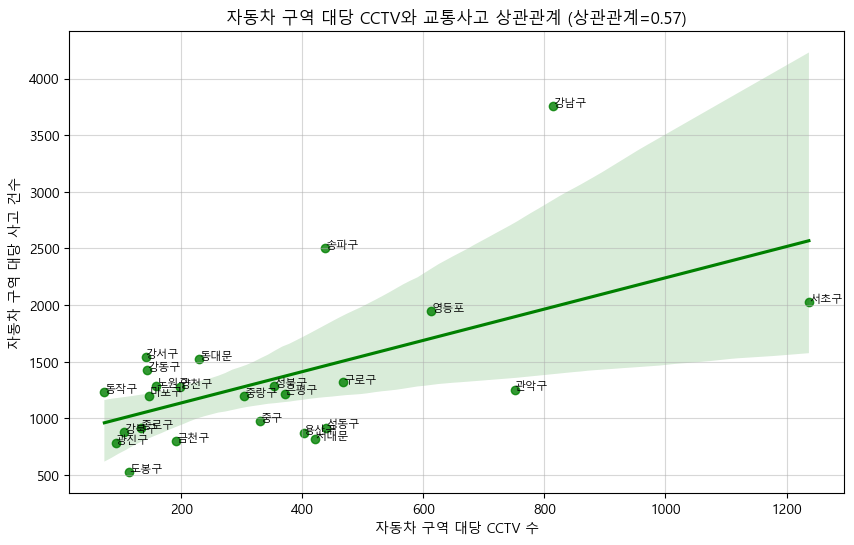

In [90]:
# 5. 시각화 (산점도)
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트
plt.figure(figsize=(10, 6))

sns.regplot(x='cctv_count', y='accident', data=merged_df, color='green')

# 구 이름 표시
for i in merged_df.index:
    plt.text(merged_df.loc[i, 'cctv_count'], 
             merged_df.loc[i, 'accident'], 
             merged_df.loc[i, 'district_x'], 
             fontsize=8)

plt.title(f"자동차 구역 대당 CCTV와 교통사고 상관관계 (상관관계={corr_coef:.2f})")
plt.xlabel("자동차 구역 대당 CCTV 수")
plt.ylabel("자동차 구역 대당 사고 건수")
plt.grid(True, alpha=0.5)
plt.show()

In [ ]:
# case A. $r$ 값이 0.4 ~ 0.8 (양수, +)
# 현상: CCTV가 많은 구일수록 사고도 많이 난다.
# 해석: "CCTV 때문에 사고가 났다"는 틀린 해석입니다.
# 이유: 강남구, 송파구처럼 **'사람과 차가 워낙 많은 곳'**이라서 사고도 자연스럽게 많고, 구청에서도 관리를 위해 CCTV를 많이 설치한 것입니다. (인과관계의 역전)

In [ ]:
#case B. $r$ 값이 -0.4 ~ -0.8 (음수, -)
# 현상: CCTV가 많을수록 사고가 적다.
# 해석: CCTV의 단속 효과가 입증된 것입니다.

In [ ]:
# case C. $r$ 값이 0에 가까움 (-0.2 ~ 0.2)
# 현상: 별 관계없음.
# 해석: 사고는 CCTV 개수보다는 도로 구조나 운전자 의식 등 다른 요인이 더 큽니다.